# Hauptkomponentenanalyse 
# (Principal Component Analysis, PCA)

## Unüberwachte Lernmethoden

Bisher haben wir uns mit überwachten Lernmethoden beschäftigt, d.h. die Aufgabe war für ein gegebenes $D \subseteq X \times Y$ die Funktion $f : X \rightarrow Y$ möglichst gut zu beschreiben.  
Beim unüberwachten Lernen geht es uns um die Struktur einer Menge 

$D = \{x^{(i)} | 1 \leq i \leq n\} \subseteq X$

und Fragestellungen wie

- Gibt es Zusammenhänge zwischen den einzelnen Dimensionen $x_1, x_2, \ldots, x_d$?
- Gibt es Gruppen innerhalb der Datenpunkte $x^{(i)}$?

Unüberwachte Lernmethoden sind oft herausfordernder, da aufgrund der im Kontrast zu überwachten Lernmethoden fehlenden Referenz Ergebnisse und Erkenntnisse händisch überprüft bzw. interpretiert werden müssen. Zum Beispiel:

- **Präzise** und formal definierte Metriken wie die Genauigkeit oder Fehlerrate fehlen.
- **Methoden** wie die Kreuzvalidierung sind nicht anwendbar.

## PCA
Ziel der Hauptkomponentenanalyse (Principal Component Analysis, PCA) ist die Dimensionsreduktion. Das bedeutet, gegeben $D \subseteq \mathbb{R}^d$ suchen wir eine Funktion

$g : \mathbb{R}^d \rightarrow \mathbb{R}^p$

mit $p < d$, sodass jedes $g(x^{(i)})$ den Punkt $x^{(i)} \in D$ möglichst gut beschreibt. Bei der PCA nimmt man an, dass $g$ eine lineare Funktion ist.

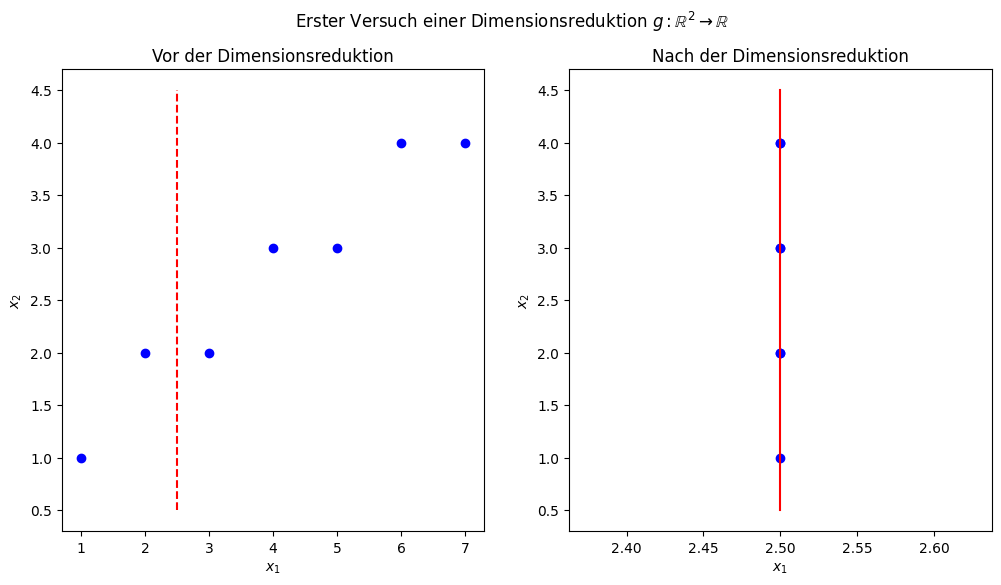

In [2]:
import matplotlib.pyplot as plt

# Daten für das Diagramm
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 2, 2, 3, 3, 4, 4]

# Erstes Diagramm
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Links: Punkte vor der Dimensionsreduktion
ax[0].scatter(x, y, color='blue')
ax[0].plot([2.5, 2.5], [0.5, 4.5], color='red', linestyle='--')
ax[0].set_title('Vor der Dimensionsreduktion')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

# Rechts: Punkte nach der Dimensionsreduktion
ax[1].scatter([2.5] * len(y), y, color='blue')
ax[1].plot([2.5, 2.5], [0.5, 4.5], color='red')
ax[1].set_title('Nach der Dimensionsreduktion')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')

# Anzeigen des Plots
plt.suptitle('Erster Versuch einer Dimensionsreduktion $g: \\mathbb{R}^2 \\rightarrow \\mathbb{R}$')
plt.show()

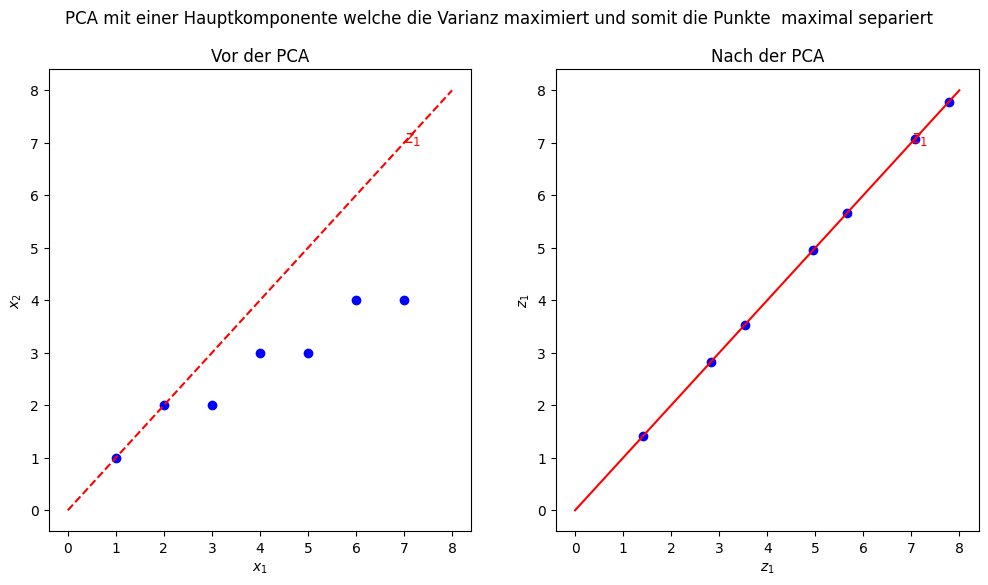

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Daten für das Diagramm
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 2, 2, 3, 3, 4, 4])

# Hauptkomponente berechnen
z1 = (x + y) / np.sqrt(2)

# Erstes Diagramm: Punkte vor der Dimensionsreduktion
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Links: Punkte vor der Dimensionsreduktion
ax[0].scatter(x, y, color='blue')
ax[0].plot([0, 8], [0, 8], color='red', linestyle='--')
ax[0].text(7, 7, '$z_1$', color='red', fontsize=12, ha='left')
ax[0].set_title('Vor der PCA')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

# Rechts: Punkte nach der PCA
ax[1].scatter(z1, z1, color='blue')
ax[1].plot([0, 8], [0, 8], color='red')
ax[1].text(7, 7, '$z_1$', color='red', fontsize=12, ha='left')
ax[1].set_title('Nach der PCA')
ax[1].set_xlabel('$z_1$')
ax[1].set_ylabel('$z_1$')

# Anzeigen des Plots
plt.suptitle('PCA mit einer Hauptkomponente welche die Varianz maximiert und somit die Punkte  maximal separiert')
plt.show()

Die erste Hauptkomponente im Beispiel erhalten wir durch die lineare Abbildung

$g(x) = z_1(x) = \phi_{11}x_1 + \phi_{12}x_2$

wobei $z_1$ die größte Varianz haben soll und $\phi$ normiert ist, d.h. $\phi_{11}^2 + \phi_{12}^2 = 1$. Den Wert $z_1(x)$ nennt man Score von Punkt $x$ bzgl. der ersten Hauptkomponente und $\phi_1 = (\phi_{11}, \phi_{12})^T$ ist deren Gewichtungsvektor.

Um diesen Problem mathematisch fassen zu können, nehmen wir an, dass für den Mittelwert der Datenpunkte gilt

$\mu = \frac{1}{n} \sum_{i=1}^{n} x^{(i)} = 0.$

Dies erreichen wir einfach durch die Berechnung des tatsächlichen Mittelwerts $\mu$ und Subtraktion von $\mu$ von jedem Datenpunkt. Wenn dies gilt, gilt auch

$\frac{1}{n} \sum_{i=1}^{n} z_1(x) = 0$

und die Varianz von $z_1$ ist somit

$\frac{1}{n} \sum_{i=1}^{n} z_1(x^{(i)})^2 = \frac{1}{n} \sum_{i=1}^{n} (\phi_{11}x_1^{(i)} + \phi_{12}x_2^{(i)})^2$.

Für den Gewichtungsvektor der ersten Hauptkomponente erhalten wir somit das Optimierungsproblem

$\text{arg max}_{\phi_{11}, \phi_{12}} \frac{1}{n} \sum_{i=1}^{n} (\phi_{11}x_1^{(i)} + \phi_{12}x_2^{(i)})^2$

unter der Bedingung

$\phi_{11}^2 + \phi_{12}^2 = 1$.

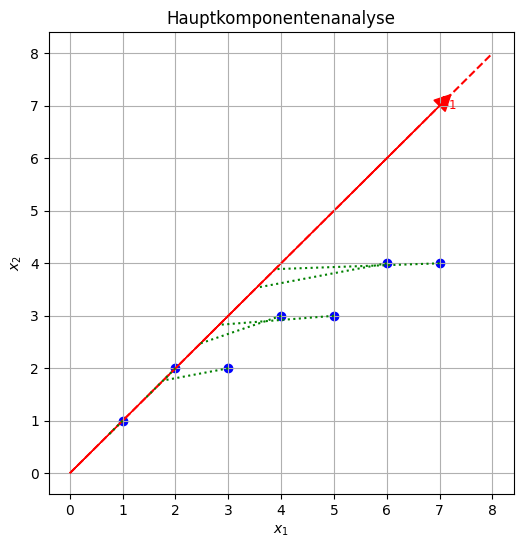

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Daten für das Diagramm
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 2, 2, 3, 3, 4, 4])

# Hauptkomponente berechnen
phi_11, phi_12 = 1/np.sqrt(2), 1/np.sqrt(2)
z1 = phi_11 * x + phi_12 * y

# Diagramm
fig, ax = plt.subplots(figsize=(6, 6))

# Punkte plotten
ax.scatter(x, y, color='blue')
ax.plot([0, 8], [0, 8], color='red', linestyle='--')
ax.text(7, 7, '$z_1$', color='red', fontsize=12, ha='left')

# Pfeil für die Hauptkomponente
ax.arrow(0, 0, 7, 7, head_width=0.3, head_length=0.3, fc='red', ec='red')

# Punkte und Projektion zeichnen
for i in range(len(x)):
    z1_i = phi_11 * x[i] + phi_12 * y[i]
    proj_x = (z1_i / np.sqrt(2)) * phi_11
    proj_y = (z1_i / np.sqrt(2)) * phi_12
    ax.plot([x[i], proj_x], [y[i], proj_y], color='green', linestyle=':')

# Achsenbeschriftungen und Titel
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Hauptkomponentenanalyse')

# Anzeigen des Plots
plt.grid()
plt.show()

Im Beispiel erhalten wir $(\phi_{11}, \phi_{12})^T = \frac{1}{\sqrt{2}} (1, 1)^T$. Ein Punkt $(2, 1)^T$ wird demnach bei einer Hauptkomponente auf den Punkt $z_1 = \frac{1}{\sqrt{2}} 2 + \frac{1}{\sqrt{2}} 1 = \frac{3}{\sqrt{2}}$ abgebildet.

Wir können nun auch das Optimierungsproblem im allgemeinen Fall für $g : \mathbb{R}^d \rightarrow \mathbb{R}^p$ für ein $d \in \mathbb{N}$ formulieren als

$\text{arg max}_{\phi_{11}, \ldots, \phi_{1p}} \frac{1}{n} \sum_{i=1}^{n} \left( \sum_{j=1}^{d} \phi_{1j} x_j^{(i)} \right)^2$

unter der Bedingung

$\sum_{j=1}^{d} \phi_{1j}^2 = 1$.

Solche Probleme kann man mit Hilfe von Eigenwertzerlegungen lösen. Wir werden uns jedoch nicht explizit damit beschäftigen.

Die weiteren Hauptkomponenten $z_2, \ldots, z_p$ mit Gewichtungsvektoren $\phi_2, \ldots, \phi_p$ für ein allgemeines $p \in \mathbb{N}$ mit $d > p$ erhalten wir sukzessive, indem wir weiter nach den varianzmaximierenden Richtungen suchen, die jeweils unkorreliert bzgl. den vorherigen Richtungen, also orthogonal, sind.




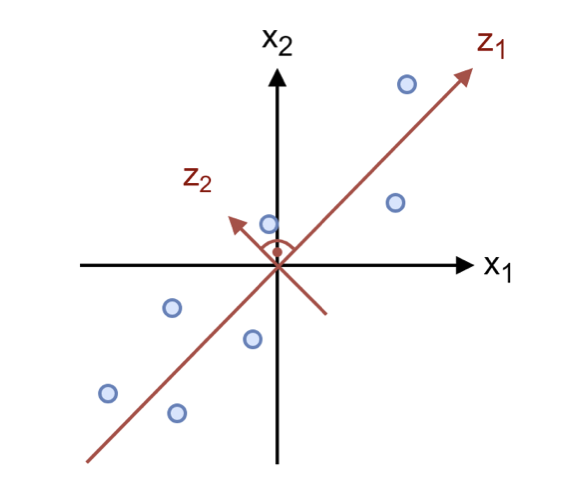

In [16]:
from IPython.display import Image, display

# Bild anzeigen
image_path = "media/pca.png"  # Pfad zum Bild
display(Image(filename=image_path))

Die zweite Hauptkomponente steht senkrecht auf der ersten Hauptkomponente. Falls wir weitere Dimensionen hätten, müsste $z_2$ auch die verbliebene Varianz maximieren.


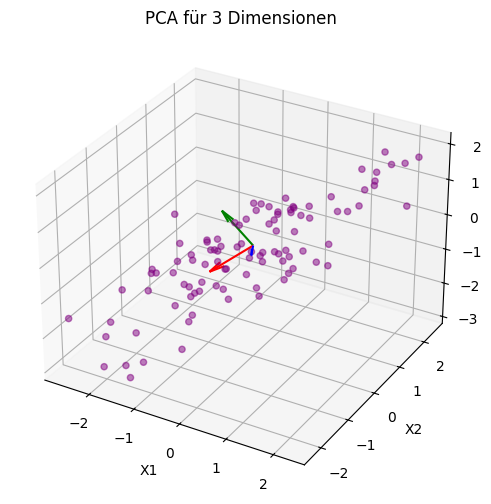

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Daten für das Diagramm
np.random.seed(0)
X = np.random.multivariate_normal([0, 0, 0], [[1, 0.9, 0.7], [0.9, 1, 0.9], [0.7, 0.9, 1]], 100)

# PCA durchführen
X_mean = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_mean, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_index]
sorted_eigenvalues = eigenvalues[sorted_index]
n_components = 3
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
X_reduced = np.dot(eigenvector_subset.transpose(), X_mean.transpose()).transpose()

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='purple', marker='o', alpha=0.5)
ax.quiver(0, 0, 0, eigenvector_subset[0, 0], eigenvector_subset[1, 0], eigenvector_subset[2, 0], color='r')
ax.quiver(0, 0, 0, eigenvector_subset[0, 1], eigenvector_subset[1, 1], eigenvector_subset[2, 1], color='g')
ax.quiver(0, 0, 0, eigenvector_subset[0, 2], eigenvector_subset[1, 2], eigenvector_subset[2, 2], color='b')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('PCA für 3 Dimensionen')

plt.show()

### Beispiel

Beispiel: Verhaftungen in den USA

Wir folgen nun dem Beispiel aus [JWHT14] und betrachten den (wichtig: normierten) USArrests Datensatz, welcher für das Jahr 1973 und die $n = 50$ Bundesstaaten der USA jeweils $d = 4$ Features enthält:

- Murder: Anzahl der Verhaftungen wegen Mordes,
- Assault: Überfall,
- Rape: Vergewaltigung, gerechnet auf 100.000 Einwohner,
- UrbanPop: der prozentuale Anteil der Bewohner in Städten.

Mit Hilfe der PCA lassen sich die ersten beiden Hauptkomponenten bestimmen als


\begin{array}{ccc}
 & \phi_1 & \phi_2 \\
\text{Murder} & 0.5358995 & -0.4181809 \\
\text{Assault} & 0.5831836 & -0.1879856 \\
\text{UrbanPop} & 0.2781909 & 0.8728062 \\
\text{Rape} & 0.5434321 & 0.1673186 \\
\end{array}



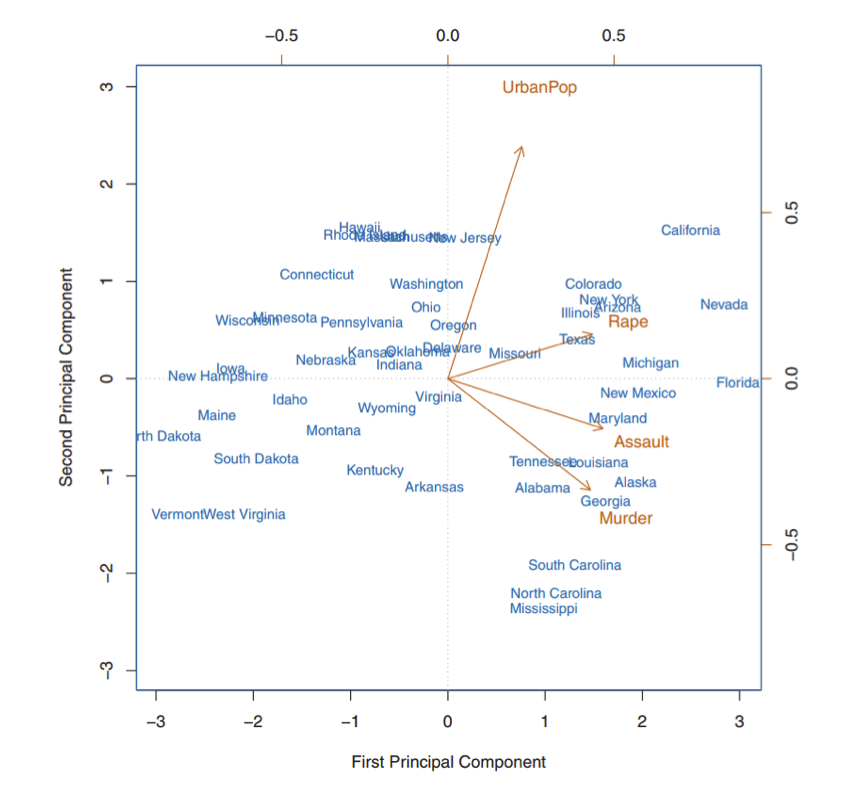

In [17]:
# Bild anzeigen
image_path = "media/pca_nouns.png"  # Pfad zum Bild
display(Image(filename=image_path))

#### Interpretation:

- Die erste Hauptkomponente mit $\phi_1 \approx (0.6, 0.6, 0.3, 0.5)^T$ korrespondiert sehr stark mit den Arten von Verbrechen (Murder, Assault, Rape) und weniger mit dem Anteil der Stadtbewohner (UrbanPop).
- Die zweite Hauptkomponente mit $\phi_2 \approx (-0.4, -0.2, 0.9, 0.2)^T$ korrespondiert sehr stark mit dem Anteil der Stadtbewohner und weniger mit den Verbrechen.
- Die Verbrechensarten korrelieren daher sehr stark miteinander, d.h. Staaten mit vielen Morden haben meist auch viele Überfälle bzw. Vergewaltigungen und umgekehrt
- Die Anzahl an Verbrechen sind nicht sehr stark abhängig davon, ob es viele Stadtbewohner gibt.

### Hinweise

Je nach Bibliothek und Optimierer, welcher verwendet wird, können sich die Hauptkomponenten im Vorzeichen unterscheiden. Die PCA ist demnach nicht eindeutig, da wenn zwei Vektoren $u, v \in \mathbb{R}^d$ orthogonal zueinander sind, d.h.

$u \cdot v = 0$ 

automatisch auch

$u \cdot (-v) = (-u) \cdot v = (-u) \cdot (-v) = 0$

gilt.

Die PCA sollte zu einem guten Verständnis der Daten führen. Zu entscheiden, wie viele Hauptkomponenten verwendet werden sollen, ist jedoch eine Kunst. Ein Hilfsmittel dafür ist der Anteil der erklärten Varianz (proportion of variance explained, PVE) der m-ten Hauptkomponente im Verhältnis zur kompletten Varianz in den Daten, d.h.

$PVEm = \frac{\sum_{i=1}^{n} z_m(x^{(i)})^2}{\sum_{i=1}^{n} \sum_{j=1}^{p} (x_j^{(i)})^2}$.

Die PCA kann als Hilfsmittel für die Dimensionsreduktion auch vorgeschaltet für überwachte Lernmethoden verwendet werden. Soll im eigentlichen überwachten Problem eine Funktion

$f : \mathbb{R}^d \rightarrow Y$

auf Daten $D \subseteq \mathbb{R}^d \times Y$ gelernt werden, wobei sowohl Klassifikation als auch Regression möglich sind, so kann evtl. mit Hilfe der PCA

$g : \mathbb{R}^d \rightarrow \mathbb{R}^p$ mit $p < d$

das Problem auf

$f' : \mathbb{R}^p \rightarrow Y$

welches auf den Daten $\{(g(x^{(i)}), y^{(i)}) | (x^{(i)}, y^{(i)}) \in D\}$ trainiert wird, reduziert werden.